In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df=pd.read_csv(r'D:\Python\Price Forecast\test.csv')

In [3]:
train_df=pd.read_csv(r'D:\Python\Price Forecast\train.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [7]:
f=open('D:\Python\Price Forecast\description.txt','r')
lines=f.readlines()
for line in lines:
    print(line)


MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [8]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
data=pd.concat([train_df,test_df])


# 数据描述

In [11]:
train_df.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

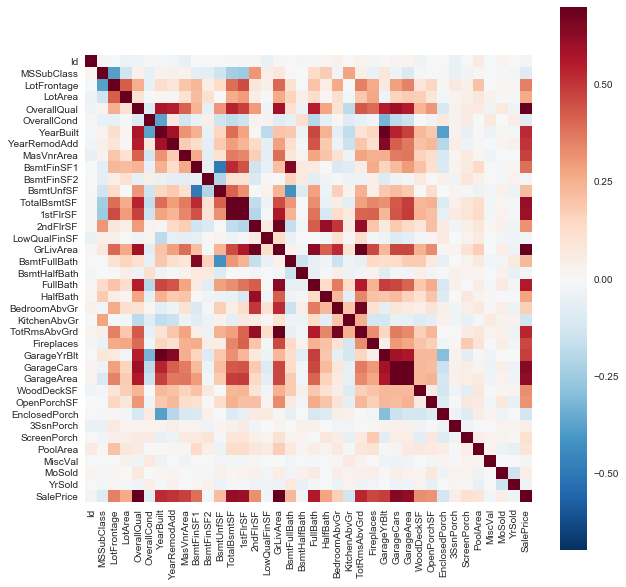

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),vmax=0.7,square=True)
plt.show()

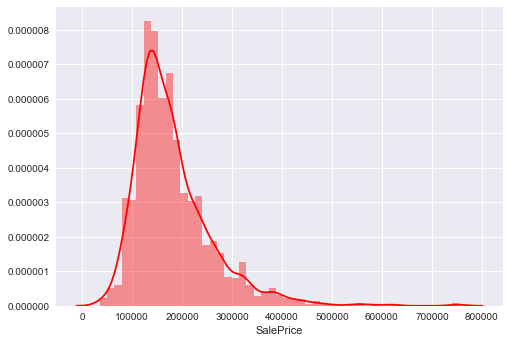

In [13]:
sns.distplot(train_df.SalePrice,color='red')
plt.show()

In [14]:
print("saleprice skew is:%r"%(train_df.SalePrice.skew()))

saleprice skew is:1.8828757597682129


In [15]:
print("saleprice kurt is:%r"%(train_df.SalePrice.kurt()))

saleprice kurt is:6.5362818600645287


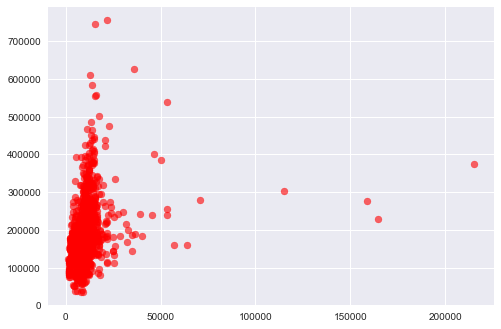

In [16]:
plt.scatter(train_df.LotArea,train_df.SalePrice,alpha=0.6,color='red')
plt.show()

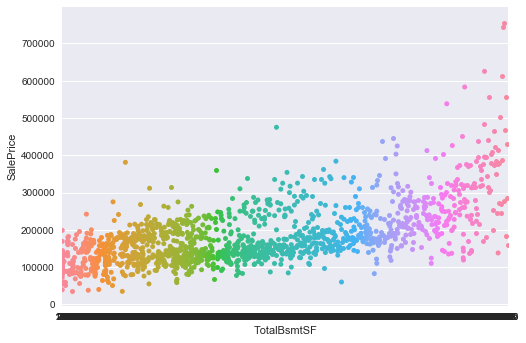

In [17]:
sns.swarmplot(x='TotalBsmtSF',y='SalePrice',data=train_df)
plt.show()

In [18]:
data['OverallQual']=data.OverallQual.map({10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
train_df['OverallQual']=train_df.OverallQual.map({10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})


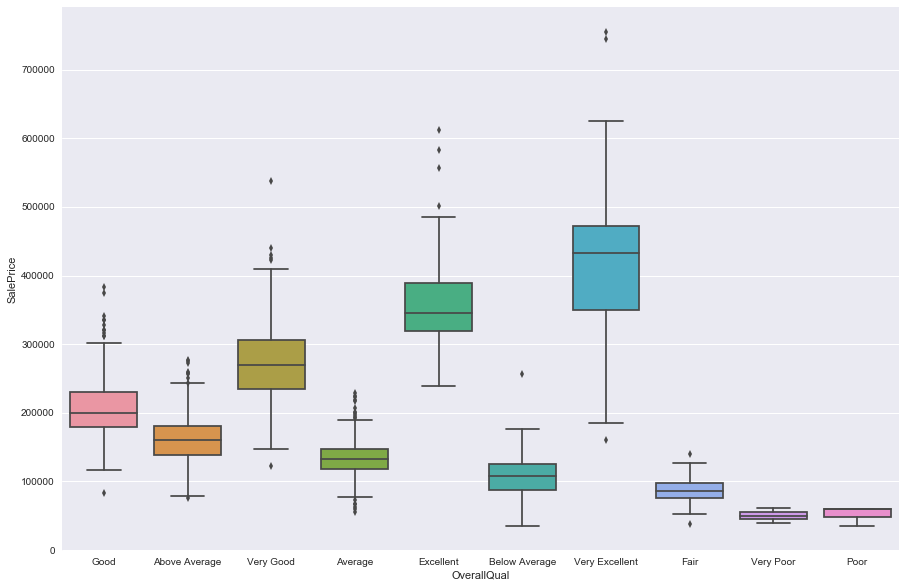

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x='OverallQual',y='SalePrice',data=train_df)
plt.show()

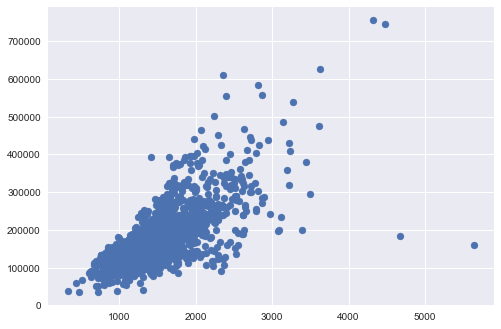

In [20]:
plt.scatter(train_df.GrLivArea,train_df.SalePrice)
plt.show()

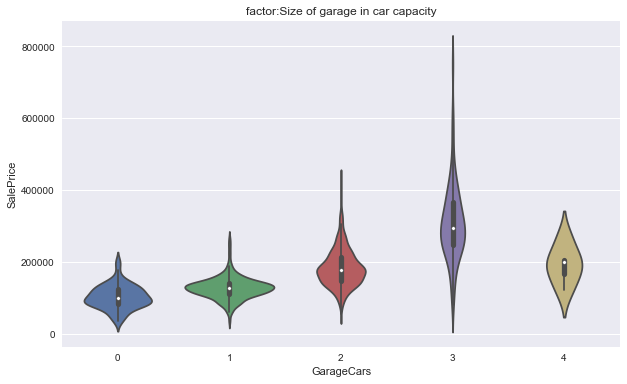

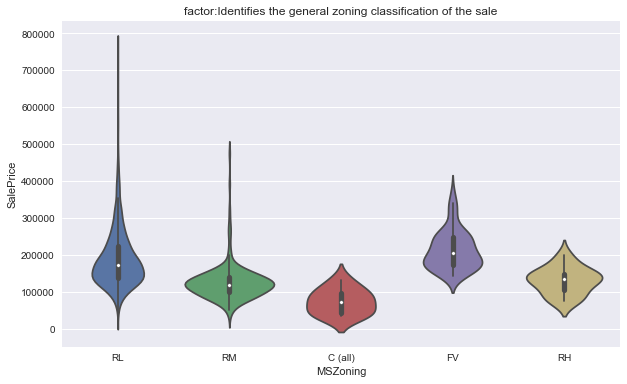

In [21]:
fig=plt.figure(figsize=(10,6))

sns.violinplot(x=train_df['GarageCars'],y=train_df['SalePrice'])
plt.title("factor:Size of garage in car capacity")
plt.show()
fig=plt.figure(figsize=(10,6))

sns.violinplot(x=train_df['MSZoning'],y=train_df['SalePrice'])
plt.title("factor:Identifies the general zoning classification of the sale")
plt.show()

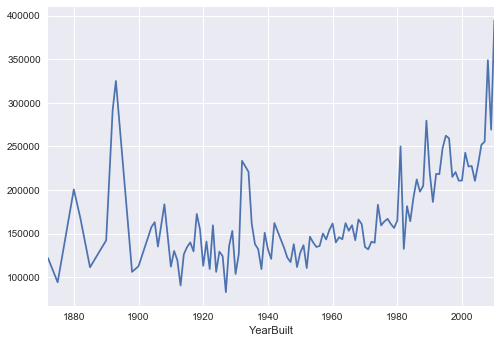

In [22]:
train_df.groupby('YearBuilt')['SalePrice'].mean().plot()
plt.show()

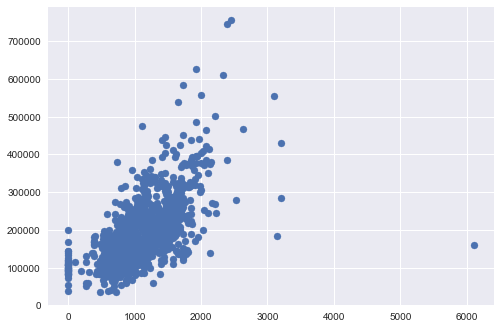

In [23]:
plt.scatter(train_df.TotalBsmtSF,train_df.SalePrice)
plt.show()

In [24]:
train_df=data[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
train_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500.0,Good,1710,2.0,548.0,856.0,856,2,8,2003,2003
1,181500.0,Above Average,1262,2.0,460.0,1262.0,1262,2,6,1976,1976
2,223500.0,Good,1786,2.0,608.0,920.0,920,2,6,2001,2002
3,140000.0,Good,1717,3.0,642.0,756.0,961,1,7,1915,1970
4,250000.0,Very Good,2198,3.0,836.0,1145.0,1145,2,9,2000,2000


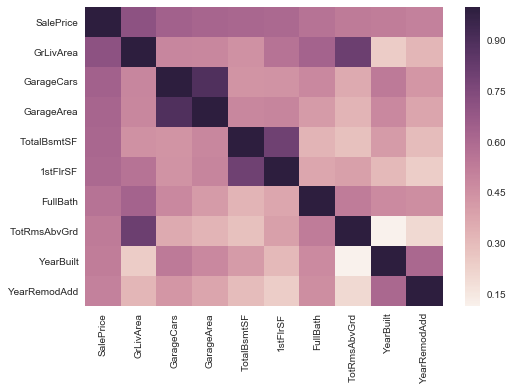

In [25]:
sns.heatmap(train_df.corr())
plt.show()

In [26]:
train_df.isnull().sum()

SalePrice       1459
OverallQual        0
GrLivArea          0
GarageCars         1
GarageArea         1
TotalBsmtSF        1
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
dtype: int64

In [27]:
train_df.shape

(2919, 11)

In [28]:
train_df.groupby('GarageCars')['GarageCars'].agg('count')

GarageCars
0.0     157
1.0     776
2.0    1594
3.0     374
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [29]:
train_df.fillna(train_df['GarageCars'].median(),inplace=True)


C:\Users\kkluc\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [30]:
train_df.GarageArea.fillna(0,inplace=True)

C:\Users\kkluc\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


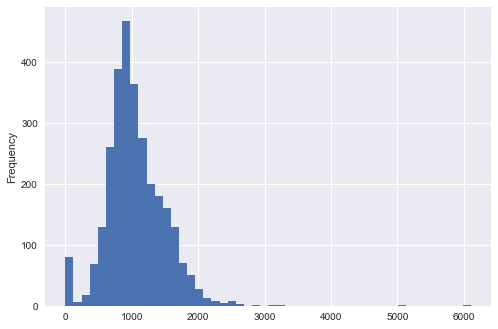

In [31]:
train_df.TotalBsmtSF.plot(kind='hist',bins=50)
plt.show()

In [32]:
train_df.TotalBsmtSF.fillna(train_df['TotalBsmtSF'].mean(),inplace=True)

C:\Users\kkluc\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
train_df.shape

(2919, 11)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
SalePrice       2919 non-null float64
OverallQual     2919 non-null object
GrLivArea       2919 non-null int64
GarageCars      2919 non-null float64
GarageArea      2919 non-null float64
TotalBsmtSF     2919 non-null float64
1stFlrSF        2919 non-null int64
FullBath        2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
YearBuilt       2919 non-null int64
YearRemodAdd    2919 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 262.3+ KB


# 特征提取

In [35]:
import numpy as np
train_df.replace({2:np.nan},inplace=True)

C:\Users\kkluc\Anaconda3\lib\site-packages\pandas\core\generic.py:3725: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [36]:
train_df.describe()

,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
count,1460.000000,2919.000000,1324.000000,2918.000000,2918.000000,2919.000000,1389.000000,2918.000000,2919.000000,2919.000000
mean,180921.195890,1500.759849,1.485650,472.874572,1051.777587,1159.581706,1.092153,6.453050,1971.312778,1984.264474
std,79442.502883,506.051045,1.065052,215.394815,440.766258,392.362079,0.458827,1.567482,30.291442,20.894344
min,34900.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,3.000000,1872.000000,1950.000000
25%,129975.000000,1126.000000,1.000000,320.000000,793.000000,876.000000,1.000000,5.000000,1953.500000,1965.000000
50%,163000.000000,1444.000000,1.000000,480.000000,989.500000,1082.000000,1.000000,6.000000,1973.000000,1993.000000
75%,214000.000000,1743.500000,3.000000,576.000000,1302.000000,1387.500000,1.000000,7.000000,2001.000000,2004.000000
max,755000.000000,5642.000000,5.000000,1488.000000,6110.000000,5095.000000,4.000000,15.000000,2010.000000,2010.000000


In [37]:
train_df.shape

(2919, 11)

In [38]:
train_df.shape

(2919, 11)

In [39]:
train_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500.0,Good,1710.0,NaN,548.0,856.0,856.0,NaN,8.0,2003.0,2003.0
1,181500.0,Above Average,1262.0,NaN,460.0,1262.0,1262.0,NaN,6.0,1976.0,1976.0
2,223500.0,Good,1786.0,NaN,608.0,920.0,920.0,NaN,6.0,2001.0,2002.0
3,140000.0,Good,1717.0,3.0,642.0,756.0,961.0,1.0,7.0,1915.0,1970.0
4,250000.0,Very Good,2198.0,3.0,836.0,1145.0,1145.0,NaN,9.0,2000.0,2000.0


In [40]:
train_df.drop(['GarageCars','FullBath'],axis=1,inplace=True)

C:\Users\kkluc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
train_df.shape

(2919, 9)

In [42]:
train_df.describe()

,SalePrice,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd
count,1460.000000,2919.000000,2918.000000,2918.000000,2919.000000,2918.000000,2919.000000,2919.000000
mean,180921.195890,1500.759849,472.874572,1051.777587,1159.581706,6.453050,1971.312778,1984.264474
std,79442.502883,506.051045,215.394815,440.766258,392.362079,1.567482,30.291442,20.894344
min,34900.000000,334.000000,0.000000,0.000000,334.000000,3.000000,1872.000000,1950.000000
25%,129975.000000,1126.000000,320.000000,793.000000,876.000000,5.000000,1953.500000,1965.000000
50%,163000.000000,1444.000000,480.000000,989.500000,1082.000000,6.000000,1973.000000,1993.000000
75%,214000.000000,1743.500000,576.000000,1302.000000,1387.500000,7.000000,2001.000000,2004.000000
max,755000.000000,5642.000000,1488.000000,6110.000000,5095.000000,15.000000,2010.000000,2010.000000


In [43]:
train_df=pd.get_dummies(columns=['OverallQual'],data=train_df,prefix='OverallQual_')

In [44]:
train_df=pd.get_dummies(columns=['TotRmsAbvGrd'],data=train_df,prefix='TotRmsAbvGrd_')

In [45]:
train_df.shape

(2919, 30)

In [46]:
train_df.columns

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'YearBuilt', 'YearRemodAdd', 'OverallQual__Above Average',
       'OverallQual__Average', 'OverallQual__Below Average',
       'OverallQual__Excellent', 'OverallQual__Fair', 'OverallQual__Good',
       'OverallQual__Poor', 'OverallQual__Very Excellent',
       'OverallQual__Very Good', 'OverallQual__Very Poor', 'TotRmsAbvGrd__3.0',
       'TotRmsAbvGrd__4.0', 'TotRmsAbvGrd__5.0', 'TotRmsAbvGrd__6.0',
       'TotRmsAbvGrd__7.0', 'TotRmsAbvGrd__8.0', 'TotRmsAbvGrd__9.0',
       'TotRmsAbvGrd__10.0', 'TotRmsAbvGrd__11.0', 'TotRmsAbvGrd__12.0',
       'TotRmsAbvGrd__13.0', 'TotRmsAbvGrd__14.0', 'TotRmsAbvGrd__15.0'],
      dtype='object')

In [47]:
train_df1=train_df[train_df.SalePrice>=0]
train_df1.shape

(1460, 30)

# 多元线性回归模型

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
x=train_df1.drop(['SalePrice'],axis=1)
y=train_df1['SalePrice']


In [50]:
line=LinearRegression()


In [51]:
line.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
test_df1=train_df.iloc[1460:,:]

In [53]:
test_df1.head()

,SalePrice,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,OverallQual__Above Average,OverallQual__Average,OverallQual__Below Average,...,TotRmsAbvGrd__6.0,TotRmsAbvGrd__7.0,TotRmsAbvGrd__8.0,TotRmsAbvGrd__9.0,TotRmsAbvGrd__10.0,TotRmsAbvGrd__11.0,TotRmsAbvGrd__12.0,TotRmsAbvGrd__13.0,TotRmsAbvGrd__14.0,TotRmsAbvGrd__15.0
0,NaN,896.0,730.0,882.0,896.0,1961.0,1961.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1329.0,312.0,1329.0,1329.0,1958.0,1958.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,NaN,1629.0,482.0,928.0,928.0,1997.0,1998.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,NaN,1604.0,470.0,926.0,926.0,1998.0,1998.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,NaN,1280.0,506.0,1280.0,1280.0,1992.0,1992.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
test_x=test_df1.drop(['SalePrice'],axis=1)

In [55]:
test_x['GarageArea'].fillna(test_x.GarageArea.mean(),inplace=True)
test_x['TotalBsmtSF'].fillna(test_x.TotalBsmtSF.median(),inplace=True)


In [56]:
test_y=np.round(line.predict(test_x),0)


In [57]:
test_y

array([ 126513.,  146052.,  175133., ...,  151595.,  119556.,  229186.])

In [58]:
line.score(x,y)

0.80827016548912711

In [59]:
ID=test_df.Id

result=pd.DataFrame({'id':ID,'result':test_y})

In [60]:
result.set_index('id',inplace=True)

In [61]:
result.to_csv(r'D:\Python\Price Forecast\result.csv')